Document clustering, or text clustering, is a very popular application of clustering algorithms. A web search engine, like Google, often returns thousands of results for a simple query. For example, if you type the search term "jaguar" into Google, around 200 million results are returned. This makes it very difficult to browse or find relevant information, especially if the search term has multiple meanings. If we search for "jaguar", we might be looking for information about the animal, the car, or the Jacksonville Jaguars football team. 

Clustering methods can be used to automatically group search results into categories, making it easier to find relavent results. This method is used in the search engines PolyMeta and Helioid, as well as on FirstGov.gov, the official Web portal for the U.S. government. The two most common algorithms used for document clustering are Hierarchical and k-means. 

In this problem, we'll be clustering articles published on Daily Kos, an American political blog that publishes news and opinion articles written from a progressive point of view. Daily Kos was founded by Markos Moulitsas in 2002, and as of September 2014, the site had an average weekday traffic of hundreds of thousands of visits. 

The file dailykos.csv contains data on 3,430 news articles or blogs that have been posted on Daily Kos. These articles were posted in 2004, leading up to the United States Presidential Election. The leading candidates were incumbent President George W. Bush (republican) and John Kerry (democratic). Foreign policy was a dominant topic of the election, specifically, the 2003 invasion of Iraq. 

Each of the variables in the dataset is a word that has appeared in at least 50 different articles (1,545 words in total). The set of  words has been trimmed according to some of the techniques covered in the previous week on text analytics (punctuation has been removed, and stop words have been removed). For each document, the variable values are the number of times that word appeared in the document. 

In [1]:
dailykos = read.csv('data/dailykos.csv')

In [2]:
str(dailykos)

'data.frame':	3430 obs. of  1545 variables:
 $ abandon                                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abc                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ability                                 : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abortion                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ absolute                                : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abstain                                 : int  0 0 1 0 0 0 0 0 0 0 ...
 $ abu                                     : int  0 0 0 0 0 0 0 0 0 0 ...
 $ abuse                                   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ accept                                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ access                                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ accomplish                              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ account                                 : int  0 0 2 0 0 0 0 0 0 0 ...
 $ accurate                                : int  0 0 0 0 0 0 0 0 0 

In [3]:
distance = dist(dailykos, method = "euclidean")

In [11]:
clusterIntensity = hclust(distance, method = "ward.D")

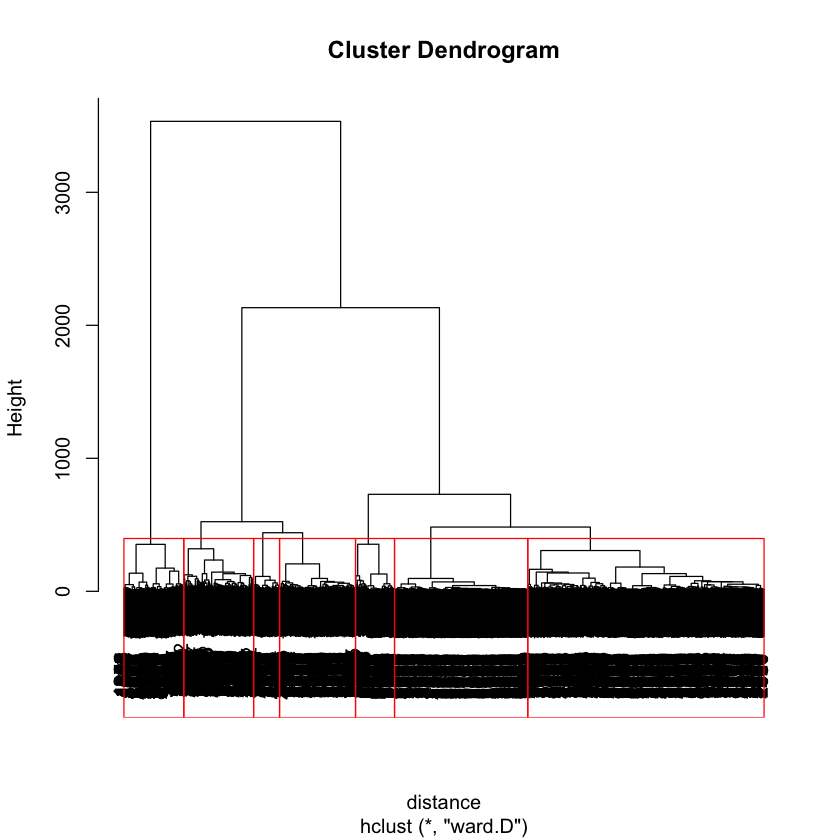

In [12]:
options(jupyter.plot_mimetypes = 'image/png')
plot(clusterIntensity)
# visulize the cuts:
rect.hclust(clusterIntensity, k = 7, border="red")

In [13]:
dailykosClusters = cutree(clusterIntensity, k = 7)

In [14]:
sum(dailykosClusters == 3)

[1] 374

In [15]:
table(dailykosClusters)

dailykosClusters
   1    2    3    4    5    6    7 
1266  321  374  139  407  714  209 

Instead of looking at the average value in each variable individually, we'll just look at the top 6 words in each cluster. To do this for cluster 1, type the following in your R console (where "HierCluster1" should be replaced with the name of your first cluster subset):

In [21]:
hierCluster1 = dailykos[dailykosClusters==1, ]
tail(sort(colMeans(hierCluster1)))

state republican       poll   democrat      kerry       bush 
 0.7575039  0.7590837  0.9036335  0.9194313  1.0624013  1.7053712

In [22]:
hierCluster1 = dailykos[dailykosClusters==2, ]
tail(sort(colMeans(hierCluster1)))

bush  democrat challenge      vote      poll  november 
 2.847352  2.850467  4.096573  4.398754  4.847352 10.339564

In [23]:
hierCluster1 = dailykos[dailykosClusters==3, ]
tail(sort(colMeans(hierCluster1)))

elect    parties      state republican   democrat       bush 
  1.647059   1.665775   2.320856   2.524064   3.823529   4.406417

In [24]:
hierCluster1 = dailykos[dailykosClusters==4, ]
tail(sort(colMeans(hierCluster1)))

campaign    voter presided     poll     bush    kerry 
1.431655 1.539568 1.625899 3.589928 7.834532 8.438849

In [25]:
hierCluster1 = dailykos[dailykosClusters==5, ]
tail(sort(colMeans(hierCluster1)))

american       presided administration            war           iraq 
      1.090909       1.120393       1.230958       1.776413       2.427518 
          bush 
      3.941032

In [26]:
hierCluster1 = dailykos[dailykosClusters==6, ]
tail(sort(colMeans(hierCluster1)))

race      bush     kerry     elect  democrat      poll 
0.4579832 0.4887955 0.5168067 0.5350140 0.5644258 0.5812325

In [27]:
hierCluster1 = dailykos[dailykosClusters==7, ]
tail(sort(colMeans(hierCluster1)))

democrat    clark   edward     poll    kerry     dean 
2.148325 2.497608 2.607656 2.765550 3.952153 5.803828

## K-Means Clustering:

In [28]:
k=7
set.seed(1000)
KMC = kmeans(dailykos, centers=k, iter.max = 1000)

In [29]:
str(KMC)

List of 9
 $ cluster     : int [1:3430] 4 4 6 4 1 4 7 4 4 4 ...
 $ centers     : num [1:7, 1:1545] 0.0342 0.0556 0.0253 0.0136 0.0491 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "1" "2" "3" "4" ...
  .. ..$ : chr [1:1545] "abandon" "abc" "ability" "abortion" ...
 $ totss       : num 896461
 $ withinss    : num [1:7] 76583 52693 99504 258927 88632 ...
 $ tot.withinss: num 730632
 $ betweenss   : num 165829
 $ size        : int [1:7] 146 144 277 2063 163 329 308
 $ iter        : int 7
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [30]:
hierCluster1 = dailykos[KMC$cluster==1, ]
tail(sort(colMeans(hierCluster1)))

state           iraq          kerry administration       presided 
      1.609589       1.616438       1.636986       2.664384       2.767123 
          bush 
     11.431507

In [31]:
hierCluster1 = dailykos[KMC$cluster==2, ]
tail(sort(colMeans(hierCluster1)))

primaries  democrat    edward     clark     kerry      dean 
 2.319444  2.694444  2.798611  3.090278  4.979167  8.277778

In [32]:
hierCluster1 = dailykos[KMC$cluster==3, ]
tail(sort(colMeans(hierCluster1)))

administration          iraqi       american           bush            war 
      1.389892       1.610108       1.685921       2.610108       3.025271 
          iraq 
      4.093863

In [33]:
hierCluster1 = dailykos[KMC$cluster==4, ]
tail(sort(colMeans(hierCluster1)))

elect republican      kerry       poll   democrat       bush 
 0.6010664  0.6175473  0.6495395  0.7474552  0.7891420  1.1473582

In [34]:
hierCluster1 = dailykos[KMC$cluster==5, ]
tail(sort(colMeans(hierCluster1)))

race     senate      state    parties republican   democrat 
  2.484663   2.650307   3.521472   3.619632   4.638037   6.993865

In [35]:
hierCluster1 = dailykos[KMC$cluster==6, ]
tail(sort(colMeans(hierCluster1)))

democrat      bush challenge      vote      poll  november 
 2.899696  2.960486  4.121581  4.446809  4.872340 10.370821

In [36]:
hierCluster1 = dailykos[KMC$cluster==7, ]
tail(sort(colMeans(hierCluster1)))

presided    voter campaign     poll     bush    kerry 
1.324675 1.334416 1.383117 2.788961 5.970779 6.480519

In [37]:
table(dailykosClusters, KMC$cluster)

                
dailykosClusters    1    2    3    4    5    6    7
               1    3   11   64 1045   32    0  111
               2    0    0    0    0    0  320    1
               3   85   10   42   79  126    8   24
               4   10    5    0    0    1    0  123
               5   48    0  171  145    3    1   39
               6    0    2    0  712    0    0    0
               7    0  116    0   82    1    0   10